# 1. 데이터 이해

## 1.2 데이터 읽기와 확인

## 분석 데이터 세트 로드

In [2]:
import pandas as pd

dat_df = pd.read_csv('dataset/energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


### 데이터의 행수와 열수 확인

In [3]:
print(dat_df.shape)

(17424, 13)


### 데이터형 확인

In [4]:
print(dat_df.dtypes)

date           object
Appliances      int64
lights          int64
T1            float64
RH_1          float64
T2            float64
RH_2          float64
T3            float64
RH_3          float64
T4            float64
RH_4          float64
T5            float64
RH_5          float64
dtype: object


### datetime형으로 데이터 변환

In [5]:
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
print(dat_df['date'].dtypes)
print(type(dat_df['date'][0]))

datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### 한 행 전과의 시간차(분) 계산

In [7]:
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60
# diff를 사용하여 한 행전의 값과의 차이 계산, dt_total_seconds에 의해 초단위 변환 이것을 60으로 나누어 분으로 환산

dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['dif_min'].head()

0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64

### 경과시간(분) 계산(1)

In [8]:
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


### 연습문제1

In [9]:
dat_df['cum_hour'] = (dat_df['cum_min']/60).round(2).astype(int)
dat_df[['date', 'cum_min', 'cum_hour']].head(10)

,date,cum_min,cum_hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,1
7,2016-01-11 18:10:00,70.0,1
8,2016-01-11 18:20:00,80.0,1
9,2016-01-11 18:30:00,90.0,1


## 1.3 결손값 확인

### 결손값 개수 확인

In [10]:
print(dat_df.isnull().sum(axis=1).sort_values(ascending=False))
print(dat_df.isnull().sum(axis=0))

9699     1
8604     1
14047    1
8586     1
11427    1
        ..
5813     0
5814     0
5815     0
5816     0
17423    0
Length: 17424, dtype: int64
date          0
Appliances    0
lights        0
T1            1
RH_1          0
T2            0
RH_2          1
T3            2
RH_3          0
T4            0
RH_4          0
T5            1
RH_5          0
dif_min       0
cum_min       0
cum_hour      0
dtype: int64


## 1.4 통계량 계산

### 각 통계량 항목 계산

In [11]:
dat_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min,cum_hour
count,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17423.000000,17422.000000,17424.000000,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17424.000000,17424.000000
mean,97.136134,4.032943,21.370848,39.892301,19.960777,40.209553,21.851889,39.165869,20.437045,38.753288,19.198926,51.053839,9.999426,87115.000000,1451.500000
std,103.247863,8.131761,1.407637,3.716096,1.949825,3.836293,1.705699,3.210397,1.775985,4.274644,1.525227,9.092618,0.075758,50300.198807,838.336598
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,30.663333,15.100000,27.660000,15.330000,29.815000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.600000,37.163333,18.666667,37.863333,20.600000,36.790000,19.338333,35.326667,18.100000,45.400000,10.000000,43557.500000,725.750000
50%,60.000000,0.000000,21.390000,39.326667,19.700000,40.360000,21.790000,38.420667,20.390000,38.133333,19.100000,48.900000,10.000000,87115.000000,1451.500000
75%,100.000000,0.000000,22.200000,42.566875,20.926667,43.000000,22.890000,41.433333,21.500000,41.658333,20.200000,53.830278,10.000000,130672.500000,2177.250000
max,1080.000000,70.000000,25.700000,63.360000,29.856667,56.026667,27.600000,50.163333,26.200000,51.090000,25.745000,96.321667,10.000000,174230.000000,2903.000000


### 연습문제2

In [12]:
dat_df.groupby('cum_hour').mean()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
cum_hour,,,,,,,,,,,,,,
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,8.333333,25.0
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,10.000000,85.0
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,10.000000,145.0
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,10.000000,205.0
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,10.000000,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,56.666667,0.000000,24.967500,48.517361,27.379524,40.701429,25.823119,45.245363,26.069643,44.474363,23.866389,52.234722,10.000000,173965.0
2900,73.333333,0.000000,25.175000,48.101111,27.150571,40.955762,25.955476,44.834286,26.100000,44.225524,23.890000,51.651111,10.000000,174025.0
2901,80.000000,0.000000,25.417222,47.490000,26.933018,40.943518,26.070000,44.574286,26.120476,43.966810,23.963333,51.218889,10.000000,174085.0


In [13]:
dat_df.groupby('cum_hour').std()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
cum_hour,,,,,,,,,,,,,,
0,5.477226,5.477226,0.000000,0.586449,0.000000,0.111888,0.000000,0.112421,0.053972,0.179315,0.021082,0.068605,4.082483,18.708287
1,208.678381,11.690452,0.094249,0.318235,0.098334,0.049065,0.030984,0.046380,0.044907,0.303102,0.027217,0.040369,0.000000,18.708287
2,141.515606,17.606817,0.276355,2.629391,0.251738,1.145478,0.140676,1.626932,0.048736,0.875112,0.042709,0.746929,0.000000,18.708287
3,37.282704,8.366600,0.089086,1.753466,0.064141,0.505110,0.050527,0.573855,0.166626,0.602464,0.276379,8.971516,0.000000,18.708287
4,5.163978,5.163978,0.132945,0.245834,0.116651,0.172597,0.040825,0.143738,0.070669,0.373986,0.373960,11.515309,0.000000,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,8.164966,0.000000,0.060807,0.315921,0.068783,0.134971,0.063521,0.330220,0.026317,0.202504,0.036673,0.243608,0.000000,18.708287
2900,10.327956,0.000000,0.087121,0.162845,0.075704,0.234359,0.053904,0.112308,0.000000,0.052098,0.000000,0.131363,0.000000,18.708287
2901,8.944272,0.000000,0.096227,0.226087,0.041438,0.208747,0.046904,0.133233,0.033826,0.132233,0.046380,0.188452,0.000000,18.708287


### 1.5 데이터 시각화

Text(0, 0.5, 'Appliance')

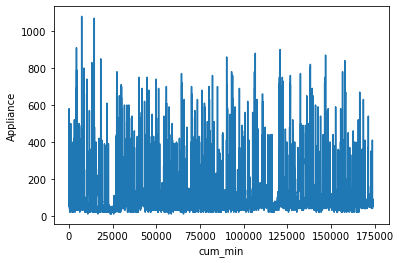

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['cum_min'], dat_df['Appliances'])

plt.xlabel('cum_min')
plt.ylabel('Appliance')
